In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import networkx as nx

In [3]:
import fincorrnets as fnx

In [4]:
fnx.viz.plot_edges??

## Binomial approximation

In [5]:
import ipywidgets

In [37]:
import pandas as pd

In [4]:
import numpy as np
import math

In [7]:
n, p, k = 1000, 0.1, 1

np.log((1-p) ** (n-1-k)),   -p*n

(-105.14979462651063, -100.0)

In [276]:
n = 1000
p = 0.003
c = p * (n-1)
p_k = np.exp(-c)
p_k, c

(0.049936653838985136, 2.997)

## The random graph model

In [56]:
math.factorial(6)

720

In [278]:
g = nx.generators.gnp_random_graph(n, p)

## X

In [12]:
from bokeh.palettes import Paired

In [13]:
Paired[12]

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

In [286]:
from bokeh.plotting import figure, output_notebook, show, save
output_notebook()

Loading BokehJS ...

In [284]:
layout = nx.layout.spring_layout(g, k=0.4, iterations=300)

In [288]:
save(p, filename='../figures/graph1.png')

/usr/local/anaconda3/lib/python3.5/site-packages/bokeh/io.py:433: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warnings.warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/anaconda3/lib/python3.5/site-packages/bokeh/io.py:443: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warnings.warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/miguel/Jottacloud/Oxford/MSc-Thesis/figures/graph1.png'

In [292]:
p = figure(plot_width=700, plot_height=700)
p.xaxis.visible = False
p.xgrid.visible = False
p.yaxis.visible = False
p.ygrid.visible = False
p.outline_line_alpha = 0
ds_edges, df_edges = fnx.edges_datasource(g, layout=layout, line_width=lambda x: x)
ds_nodes, df_nodes = fnx.nodes_datasource(g, layout=layout)
fnx.plot_edges(p, ds=ds_edges)
fnx.plot_nodes(p, ds=ds_nodes)

# show the results

show(p)


In [ ]:
p_k = math.factorial(6)

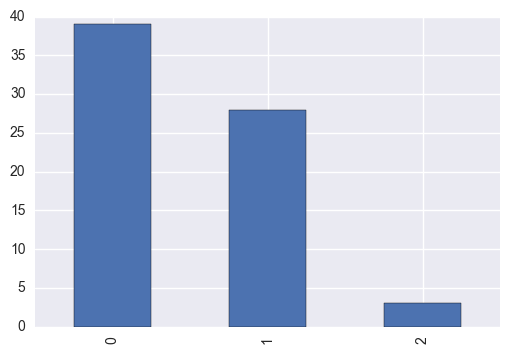

In [275]:
%matplotlib inline
ser = pd.Series(nx.degree_histogram(g))
ser.plot.bar();

## Giant component

In [261]:
c = np.linspace(0.00001,4, 100)
s = - 1 / c * np.log( 1.0 / c)
s = s * (c > 1)

In [262]:
s = np.linspace(0.000001, .999999, 200)
c = - np.log(1-s) / s

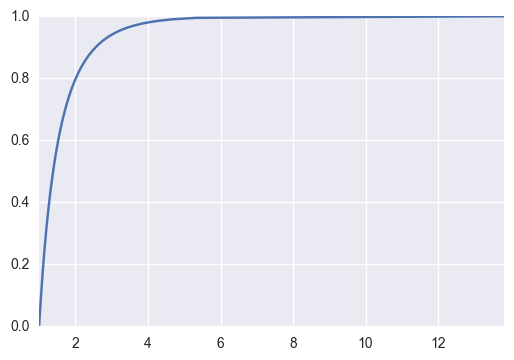

In [97]:
%matplotlib inline
ser = pd.Series(s, index=c)
ser.plot.line()

## Small components

In [263]:
n = 70
p = np.linspace(np.finfo(float).eps, 0.4, 1000)
c = p * (n-1)
ss = lambda c_: 1 + LambertW(-c_ * np.exp(-c_)) / c_ if c_ >= 1. else 0.
f_ss = np.vectorize(ss)
m_c = 1 / (1 -  c[1:] + c[1:]*f_ss(c[1:]))

R   = 2 / (2 -  c[1:] + c[1:]*f_ss(c[1:]))

In [108]:
from sympy import LambertW

In [204]:
import matplotlib.pyplot as plt

## Fraction of nodes on giant component

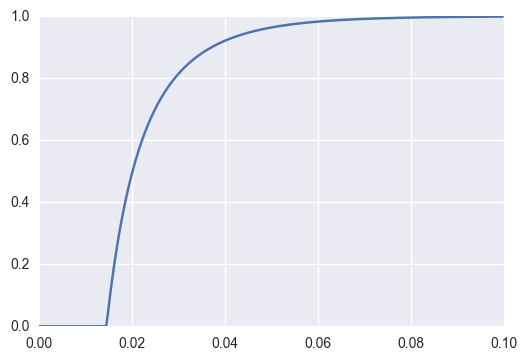

In [273]:
%matplotlib inline 
plt.plot(p[0:250], f_ss(c)[0:250]);
plt.savefig('../figures/s_as_function_of_p.png')

## $\pi_s$

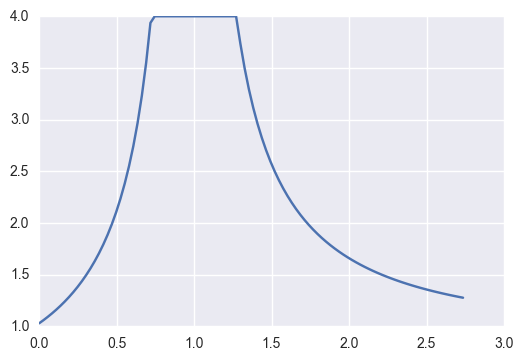

In [272]:
%matplotlib inline
plt.plot(c[0:100], np.clip(m_c[0:100], 0, 4));
plt.savefig('../figures/pi_s.png')

## Average size of small components

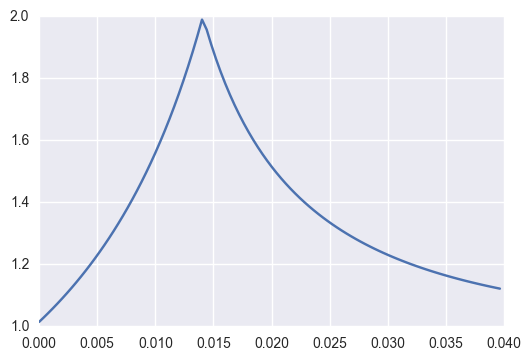

In [271]:
%matplotlib inline
plt.plot(p[0:100], R[0:100])
plt.savefig('../figures/gnp_size_small_components.png');

## Number of components

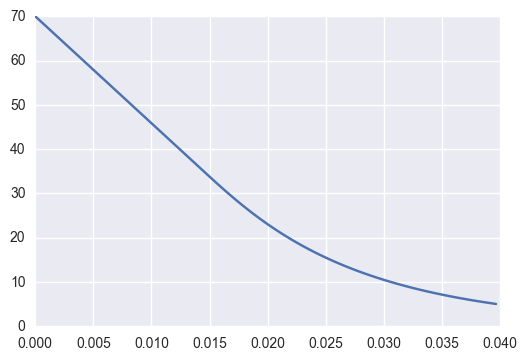

In [270]:
%matplotlib inline
comp = lambda n, c, S: n * (1 - S - 0.5 * c * (1-S) ** 2)
plt.plot(p[0:100], comp(n, c[0:100], f_ss(c[0:100])));
plt.savefig('../figures/gnp_number_components.png');

## Size of components

$$\frac{e^{-s c} (s c)^{s-1}}{s!}$$

In [21]:
fct = np.vectorize(math.factorial)

In [44]:
sz = np.linspace(1,20,20)
n = 75
p1 = 0.01
p2 = 0.02
c1 = p1 * (n-1)
c2 = p2 * (n-1)

In [45]:
pi_s1 = np.exp(-sz * c1) * (sz * c1) ** (sz-1) / fct(sz)
pi_s2 = np.exp(-sz * c2) * (sz * c2) ** (sz-1) / fct(sz)

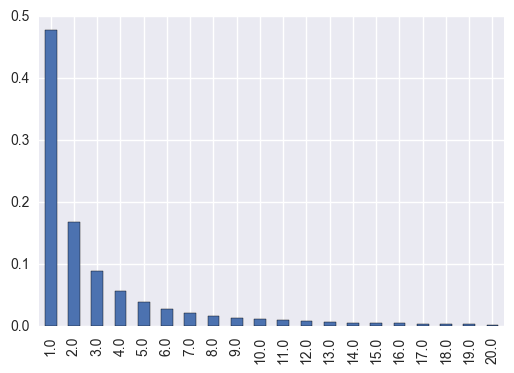

In [46]:
%matplotlib inline
pd.Series(pi_s1, index=sz).plot.bar()

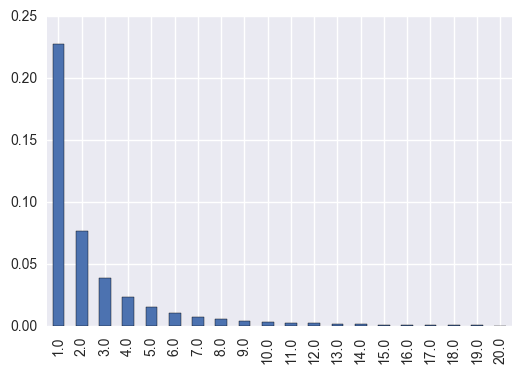

In [47]:
%matplotlib inline
pd.Series(pi_s2, index=sz).plot.bar()